# Crawl the Web

In [1]:
import numpy as np
import pandas as pd

np.__version__, pd.__version__

('1.23.5', '2.1.0')

https://www.google.com/search?q=fernando+monti&sca_esv=572078159&source=hp&ei=ZJ8kZeWDHNit5OUPo-OhsAk&iflsig=AO6bgOgAAAAAZSStdM7u_rnC2pHmLg-K8-4Fu4KjSMXS&ved=0ahUKEwjlxYqJoeqBAxXYFrkGHaNxCJYQ4dUDCAo&uact=5&oq=fernando+monti&gs_lp=Egdnd3Mtd2l6Ig5mZXJuYW5kbyBtb250aTIFEC4YgAQyBRAuGIAEMgUQABiABDIFEAAYgAQyBRAAGIAEMgUQABiABDIFEAAYgAQyCBAAGIoFGIYDMggQABiKBRiGA0jIMlCyB1iiIHABeACQAQCYAY0CoAHeEKoBBjAuMTMuMbgBA8gBAPgBAagCAMICCxAuGIAEGMcBGNEDwgIIEAAYgAQYyQPCAggQABiKBRiSA8ICCxAuGK8BGMcBGIAE&sclient=gws-wiz    
- https://www.google.com/search?q={content}&ln=en

In [3]:
from bs4 import BeautifulSoup
import requests

#cnt = "To read from a literal string, wrap it in a 'StringIO' object."
cnt = "cats"
url_str = f'https://www.google.com/search?q={cnt}&ln=en'
rsp = requests.get(url=url_str)
print(rsp)
soup = BeautifulSoup(rsp.text, 'html.parser')
print(soup.text)


<Response [200]>
cats - Buscar con GoogleGoogle×Haz clic aquí si no vuelves a acceder en pocos segundos.    TodosImágenesVideosShopping Maps Noticias Libros Herramientas de búsqueda    Cualquier idiomaCualquier idiomaBuscar páginas en EspañolDe cualquier fechaDe cualquier fecha Última hora Últimas 24 horas Última semana Último mes Último añoTodos los resultadosTodos los resultadosFrase exactaCats2019 ‧ Musical/Fantasía ‧ 1h 50m3.1/10 · FilmAffinity
1.7/5 · SensaCine
2.8/10 · IMDb
Una tribu de gatos debe decidir, como cada año, cuál de ellos ascenderá al Heaviside Layer y, así, podrá renacer y volver en una nueva vida.Fecha de estreno: 20 de diciembre de 2019 (Estados Unidos)Director: Tom HooperRecaudación: 75.5 millones USDPresupuesto: 95 millones USDAdaptaciones de: Cats y El libro de los gatos habilidosos del viejo PossumCancionesJellicle Songs for Jellicle Cats (From "Cats")The Theatreland ChorusThe Old Gumbie Cat (From "Cats")The Theatreland ChorusThe Rum Tum Tugger (From "Cats")Th

In [ ]:
# https://evertutorial.com/articles/PythonAutomation/AutomatedWebSearch

## API Key ---

# 1. Write xlsx files

- Usually an exercise of spreadsheet automatation begin with an existing xlsx.
- But we don't have xlsx files already, then
- Our first exercise wil be:
  1. Create two python dicts with duplicate rows.
  2.  Create two diff DataFrames from early dicts.
  3.  Write these DFs as xlsx files

In [ ]:
### 1.1.
d1 = {'Col 1': [i*2 if i < 3 else 2 for i in range(4)],
      'Col 2': [0, 1, 0, 1],
      'Col 3': [i*3  if i < 1 else 2 for i in range(4)],
      'Col 4': [9, 2, 7, 2],
      'Col 5': [6, 5, 3, 5]}

d2 = {'Col 1': ['a', 'b', 'a'],
      'Col 2': ['x', 't', 'x'],
      'Col 3': ['m', 'u', 'm'],}

### 1.2.
df1 = pd.DataFrame(d1)
df2 = pd.DataFrame(d2)

# display the DFs (rows 1 & 3 in df1 and rows 0 & 2 in df2 are duplicates)
display(df1)
display(df2)

# see all the duplicates rows
display(df1[df1.duplicated(keep=False)])
display(df2[df2.duplicated(keep=False)])

### 1.3. (if the file exists it will be overwritten)
df1.to_excel('f1.xlsx', index=False)
df2.to_excel('f2.xlsx', index=False)


,Col 1,Col 2,Col 3,Col 4,Col 5
0,0,0,0,9,6
1,2,1,2,2,5
2,4,0,2,7,3
3,2,1,2,2,5


,Col 1,Col 2,Col 3
0,a,x,m
1,b,t,u
2,a,x,m


,Col 1,Col 2,Col 3,Col 4,Col 5
1,2,1,2,2,5
3,2,1,2,2,5


,Col 1,Col 2,Col 3
0,a,x,m
2,a,x,m


## 2. Read and Concatenate two xslx files and write result.

1. Read f1.xslx and f2.xslx files created early as DFs.
2. Concatenate both DF as a new df
3. Write f3.xslx with the result of 2.

In [ ]:
df_21 = pd.read_excel('f1.xlsx')
df_22 = pd.read_excel('f2.xlsx')

# ignore_index=True aensures that the index values from both files are reset
concat_12 = pd.concat([df_21, df_22], ignore_index=True)
concat_21 = pd.concat([df_22, df_21], ignore_index=True)
display(concat_12, concat_21)

concat_12.to_excel('concat_12.xlsx', index=False)
concat_21.to_excel('concat_21.xlsx', index=False)

,Col 1,Col 2,Col 3,Col 4,Col 5
0,0,0,0,9.0,6.0
1,2,1,2,2.0,5.0
2,4,0,2,7.0,3.0
3,2,1,2,2.0,5.0
4,a,x,m,NaN,NaN
5,b,t,u,NaN,NaN
6,a,x,m,NaN,NaN


,Col 1,Col 2,Col 3,Col 4,Col 5
0,a,x,m,NaN,NaN
1,b,t,u,NaN,NaN
2,a,x,m,NaN,NaN
3,0,0,0,9.0,6.0
4,2,1,2,2.0,5.0
5,4,0,2,7.0,3.0
6,2,1,2,2.0,5.0


## 2b. Concat more than two DFs, and with diferent columns names.

In [ ]:
d3 = {'Col 1': [i*2 if i < 3 else 2 for i in range(4)],
      'Col 2': [0, 1, 0, 1],
      'Col 3': [i*3  if i < 1 else 2 for i in range(4)],
      'Col 4': [9, 2, 7, 2],
      'Col 5': [6, 5, 3, 5]}

d4 = {'one': ['a', 'b', 'a'],
      'two': ['x', 't', 'x'],
      'three': ['m', 'u', 'm'],}

d5 = {'Col 1': [chr(i) for i in range(88, 91)],
      'Col 2': [ord(i) for i in ['X', 'Y', 'Z']]}

df3, df4, df5 = pd.DataFrame(d3), pd.DataFrame(d4), pd.DataFrame(d5)
display(df3, df4, df5)

concat_345 = pd.concat([df3, df4, df5], ignore_index=True)
concat_345

,Col 1,Col 2,Col 3,Col 4,Col 5
0,0,0,0,9,6
1,2,1,2,2,5
2,4,0,2,7,3
3,2,1,2,2,5


,one,two,three
0,a,x,m
1,b,t,u
2,a,x,m


,Col 1,Col 2
0,X,88
1,Y,89
2,Z,90


,Col 1,Col 2,Col 3,Col 4,Col 5,one,two,three
0,0,0.0,0.0,9.0,6.0,NaN,NaN,NaN
1,2,1.0,2.0,2.0,5.0,NaN,NaN,NaN
2,4,0.0,2.0,7.0,3.0,NaN,NaN,NaN
3,2,1.0,2.0,2.0,5.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,a,x,m
5,NaN,NaN,NaN,NaN,NaN,b,t,u
6,NaN,NaN,NaN,NaN,NaN,a,x,m
7,X,88.0,NaN,NaN,NaN,NaN,NaN,NaN
8,Y,89.0,NaN,NaN,NaN,NaN,NaN,NaN
9,Z,90.0,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Clean and Transform Data.

### 3.1. Remove duplicates (rows)

In [ ]:
# Let's take concat_345 DF and see the duplicates rows
display(concat_345[concat_345.duplicated(keep=False)])
# Let´s remove the duplicate rows
df_wo_dup = concat_345.drop_duplicates()
display(df_wo_dup)
display(df_wo_dup[df_wo_dup.duplicated(keep=False)])
print('row 3 and 6 disappear, and now reset_index:')
df_wo_dup = df_wo_dup.reset_index(drop=True)
display(df_wo_dup)

,Col 1,Col 2,Col 3,Col 4,Col 5,one,two,three
1,2,1.0,2.0,2.0,5.0,NaN,NaN,NaN
3,2,1.0,2.0,2.0,5.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,a,x,m
6,NaN,NaN,NaN,NaN,NaN,a,x,m


,Col 1,Col 2,Col 3,Col 4,Col 5,one,two,three
0,0,0.0,0.0,9.0,6.0,NaN,NaN,NaN
1,2,1.0,2.0,2.0,5.0,NaN,NaN,NaN
2,4,0.0,2.0,7.0,3.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,a,x,m
5,NaN,NaN,NaN,NaN,NaN,b,t,u
7,X,88.0,NaN,NaN,NaN,NaN,NaN,NaN
8,Y,89.0,NaN,NaN,NaN,NaN,NaN,NaN
9,Z,90.0,NaN,NaN,NaN,NaN,NaN,NaN


,Col 1,Col 2,Col 3,Col 4,Col 5,one,two,three


row 3 and 6 disappear, and now reset_index:


,Col 1,Col 2,Col 3,Col 4,Col 5,one,two,three
0,0,0.0,0.0,9.0,6.0,NaN,NaN,NaN
1,2,1.0,2.0,2.0,5.0,NaN,NaN,NaN
2,4,0.0,2.0,7.0,3.0,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,a,x,m
4,NaN,NaN,NaN,NaN,NaN,b,t,u
5,X,88.0,NaN,NaN,NaN,NaN,NaN,NaN
6,Y,89.0,NaN,NaN,NaN,NaN,NaN,NaN
7,Z,90.0,NaN,NaN,NaN,NaN,NaN,NaN


### 3.2. Handle missing values (NaNs)
>https://www.datacamp.com/tutorial/techniques-to-handle-missing-data-values
- df_wo_dup don't have duplicates but have a lot of NaN - change it
- if the col is numeric select average if categorical letter c


In [ ]:
# Only to see columns dtypes and 'kind'
for cn in df_wo_dup.columns:
    col = df_wo_dup[cn]
    print(f'''{cn}.dtype: {col.dtype} - {cn}.dtype.kind: {col.dtype.kind}''')
# in general we can compare w/ if kind in 'iufc': signed int, unsigned int, float,
# complex, with biufco add bool and object.

print()

# first check if the col has NaNs:
for cn in df_wo_dup.columns:
    print(f'''{cn}: {df_wo_dup[cn].isna().any()}''')
# or loop in a list of only the cols tha have NaNs
nan_cols = df_wo_dup.columns[df_wo_dup.isna().any()].tolist()

# Now check if col is numeric or categorical (object).
# If num. we decide to fill w/the average, if not w/letter c.
for col in nan_cols:
    if df_wo_dup[col].dtype.kind in 'iufc':
        # value = df_wo_dup[col].mean().__round__(1)
        val = np.round(df_wo_dup[col].mean(), 1)
    else:
        val = 'c'
    df_wo_dup[col].fillna(val, inplace=True)

df_wo_dup

# #f_wo_dup.loc[:, col] = df_wo_dup[col].fillna(col_avg)
# df_wo_dup[col] = df_wo_dup[col].fillna(col_avg) or df_wo_dup[col].fillna(col_avg, inplace=True)
# Try using .loc[row_indexer,col_indexer] = value instead
# https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

Col 1.dtype: object - Col 1.dtype.kind: O
Col 2.dtype: float64 - Col 2.dtype.kind: f
Col 3.dtype: float64 - Col 3.dtype.kind: f
Col 4.dtype: float64 - Col 4.dtype.kind: f
Col 5.dtype: float64 - Col 5.dtype.kind: f
one.dtype: object - one.dtype.kind: O
two.dtype: object - two.dtype.kind: O
three.dtype: object - three.dtype.kind: O

Col 1: True
Col 2: True
Col 3: True
Col 4: True
Col 5: True
one: True
two: True
three: True


,Col 1,Col 2,Col 3,Col 4,Col 5,one,two,three
0,0,0.0,0.0,9.0,6.0,c,c,c
1,2,1.0,2.0,2.0,5.0,c,c,c
2,4,0.0,2.0,7.0,3.0,c,c,c
3,c,44.7,1.3,6.0,4.7,a,x,m
4,c,44.7,1.3,6.0,4.7,b,t,u
5,X,88.0,1.3,6.0,4.7,c,c,c
6,Y,89.0,1.3,6.0,4.7,c,c,c
7,Z,90.0,1.3,6.0,4.7,c,c,c


### 3.3. Filter data based on specific creteria.

In [ ]:
### Get the rows that the value of Col2 >= 10.0
# Native Pandas filtering
display(df_wo_dup[df_wo_dup['Col 2'] >= 10.0].reset_index(drop=True))
# Using query pands function
display(df_wo_dup.query('`Col 2` >= 10.0').reset_index(drop=True))

,Col 1,Col 2,Col 3,Col 4,Col 5,one,two,three
0,c,44.7,1.3,6.0,4.7,a,x,m
1,c,44.7,1.3,6.0,4.7,b,t,u
2,X,88.0,1.3,6.0,4.7,c,c,c
3,Y,89.0,1.3,6.0,4.7,c,c,c
4,Z,90.0,1.3,6.0,4.7,c,c,c


,Col 1,Col 2,Col 3,Col 4,Col 5,one,two,three
0,c,44.7,1.3,6.0,4.7,a,x,m
1,c,44.7,1.3,6.0,4.7,b,t,u
2,X,88.0,1.3,6.0,4.7,c,c,c
3,Y,89.0,1.3,6.0,4.7,c,c,c
4,Z,90.0,1.3,6.0,4.7,c,c,c


### 3.4. Perform Calculations on the Data.
- I will add two colums to the early used df_wo_dup DF.
    1. Substract from Col 2 the sum of Col 3 and Col 5.
    2. Str composed between Col 4 and one.

In [ ]:
# 1. 
df_wo_dup['C2-(C3+C5)'] = df_wo_dup['Col 2'] - (df_wo_dup['Col 3'] +
                                                df_wo_dup['Col 5'])
# 2.
df_wo_dup['Label'] = (df_wo_dup['Col 4'].astype(int).astype(str) +
                      '_' + df_wo_dup.one)

df_wo_dup.info()
df_wo_dup

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Col 1       8 non-null      object 
 1   Col 2       8 non-null      float64
 2   Col 3       8 non-null      float64
 3   Col 4       8 non-null      float64
 4   Col 5       8 non-null      float64
 5   one         8 non-null      object 
 6   two         8 non-null      object 
 7   three       8 non-null      object 
 8   C2-(C3+C5)  8 non-null      float64
 9   Label       8 non-null      object 
dtypes: float64(5), object(5)
memory usage: 768.0+ bytes


,Col 1,Col 2,Col 3,Col 4,Col 5,one,two,three,C2-(C3+C5),Label
0,0,0.0,0.0,9.0,6.0,c,c,c,-6.0,9_c
1,2,1.0,2.0,2.0,5.0,c,c,c,-6.0,2_c
2,4,0.0,2.0,7.0,3.0,c,c,c,-5.0,7_c
3,c,44.7,1.3,6.0,4.7,a,x,m,38.7,6_a
4,c,44.7,1.3,6.0,4.7,b,t,u,38.7,6_b
5,X,88.0,1.3,6.0,4.7,c,c,c,82.0,6_c
6,Y,89.0,1.3,6.0,4.7,c,c,c,83.0,6_c
7,Z,90.0,1.3,6.0,4.7,c,c,c,84.0,6_c


## 4. Perform Data Analysis w/Python
- 4.1. Statistics values
- 4.2. Custom reports

In [ ]:
# Summary statistics
df_wo_dup.describe()

,Col 2,Col 3,Col 4,Col 5,C2-(C3+C5)
count,8.000000,8.000000,8.000000,8.000000,8.000000
mean,44.675000,1.312500,6.000000,4.687500,38.675000
std,41.049334,0.617454,1.927248,0.816679,41.049334
min,0.000000,0.000000,2.000000,3.000000,-6.000000
25%,0.750000,1.300000,6.000000,4.700000,-5.250000
50%,44.700000,1.300000,6.000000,4.700000,38.700000
75%,88.250000,1.475000,6.250000,4.775000,82.250000
max,90.000000,2.000000,9.000000,6.000000,84.000000


In [ ]:
# df.pivot_table(values='column_name', index='category_name', columns='date')
df_wo_dup.pivot_table(values='Col 2', index='two', columns='C2-(C3+C5)')

C2-(C3+C5),-6.0,-5.0,38.7,82.0,83.0,84.0
two,,,,,,
c,0.5,0.0,NaN,88.0,89.0,90.0
t,NaN,NaN,44.7,NaN,NaN,NaN
x,NaN,NaN,44.7,NaN,NaN,NaN


## 5. Charts with Python

<Axes: xlabel='C2-(C3+C5)'>

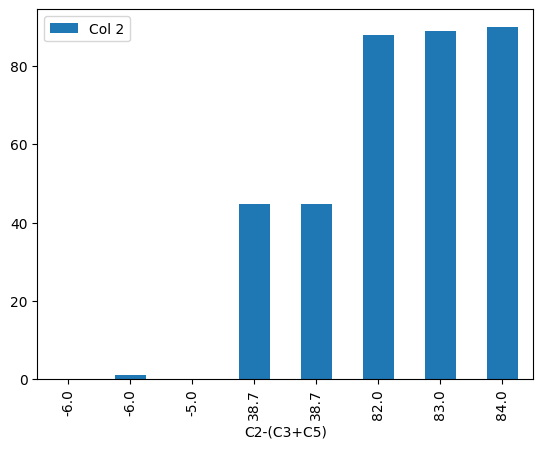

In [ ]:
df_wo_dup.plot(kind='bar', y='Col 2', x='C2-(C3+C5)')

<Axes: xlabel='Col 5', ylabel='C2-(C3+C5)'>

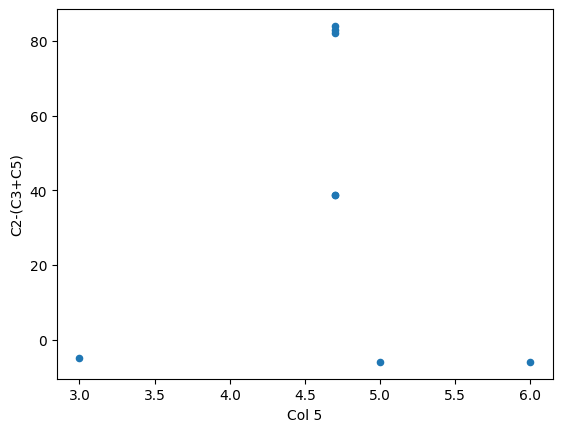

In [ ]:
df_wo_dup.plot(kind='scatter', x='Col 5', y='C2-(C3+C5)')

## 6. Data Visualization - Heatmap.

In [ ]:
# Wi'll use correlation matrix only with numeric cols
# ncols = [col for col in  df_wo_dup.columns if df_wo_dup[col].dtype == 'float64']
ncols = [col for col in  df_wo_dup.columns if df_wo_dup[col].dtype.kind in 'iuf']
print(ncols)
df_corr = df_wo_dup[ncols].corr()
df_corr

['Col 2', 'Col 3', 'Col 4', 'Col 5', 'C2-(C3+C5)']


,Col 2,Col 3,Col 4,Col 5,C2-(C3+C5)
Col 2,1.000000,-0.021235,-0.007223,0.020316,0.999915
Col 3,-0.021235,1.000000,-0.720295,-0.756055,-0.021235
Col 4,-0.007223,-0.720295,1.000000,0.090764,0.001806
Col 5,0.020316,-0.756055,0.090764,1.000000,0.011793
C2-(C3+C5),0.999915,-0.021235,0.001806,0.011793,1.000000


### 6.1. Matplotlib Heatmap

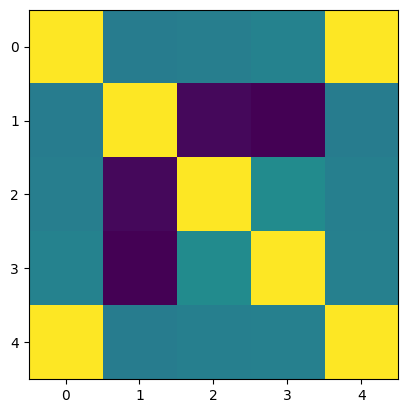

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
im = ax.imshow(df_corr)


### 6.2. Seaborn Heatmap

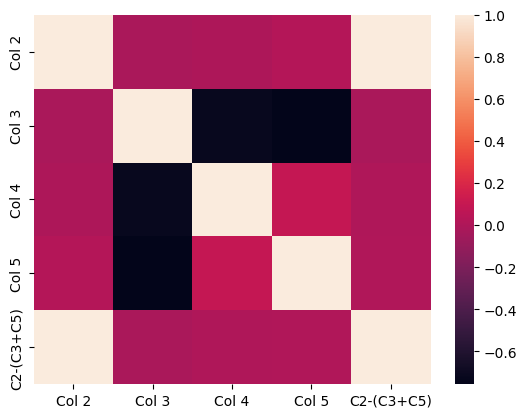

In [ ]:
import seaborn as sns

im = sns.heatmap(data=df_corr)

### 6.3. Plotly Heatmap

In [ ]:
import plotly.express as px

fig = px.imshow(df_corr)
fig




## 7. Data Visualization - Line Plot -  Plyplot

In [ ]:
px.line(df_wo_dup, x='Col 2', y='C2-(C3+C5)')

## 8. Automate Report Generation with Python.

In [ ]:
# # Create daily report
# df_daily = df[df['date'] == '2022-01-01']
# df_daily.to_excel('daily_report.xlsx', index=False)
# # Create weekly report
# df_weekly = df.groupby('category').sum()
# df_weekly.to_excel('weekly_report.xlsx', index=False)

## 9. Automate Tasks w/Macros and Scripts in Python.

In [ ]:
# import win32com.client as win32
# # Open Excel file
# excel = win32.gencache.EnsureDispatch('Excel.Application')
# workbook = excel.Workbooks.Open(r'filename.xlsx')
# # Run macro
# excel.Application.Run('macro_name')
# # Save and close Excel
#  fileworkbook.Save()workbook.Close()excel.Quit()

## 10. Scrape Data with Python.

In [ ]:
import requests
from bs4 import BeautifulSoup
# Scrape data from web page
url = 'https://en.wikipedia.org/wiki/List_of_largest_cities'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find('table')
df = pd.read_html(str(table))[0]
# Export to Excel file
df.to_excel('scraped_data.xlsx', index=False)

C:\Users\jm\AppData\Local\Temp\ipykernel_17684\2441773008.py:8: FutureWarning:

Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.



ImportError: Missing optional dependency 'lxml'.  Use pip or conda to install lxml.

In [ ]:
# https://www.freecodecamp.org/news/automate-excel-tasks-with-python/